In [1]:
import pandas as pd

# Creazione del DataFrame
data = {
    'Node Index': [1, 2, 3, 4, 5, 6],
    'Type': [1, 3, 3, 3, 3, 3],
    'X Coordinate': [0, 1, 1, 2, 2, 3],
    'Y Coordinate': [0, 1, -1, 2, -2, 3],
    'Z Coordinate': [0, 0, 0, 0, 0, 0],
    'Radius': [1, 1, 1, 1, 1, 1],
    'Parent Node Index': [-1, 1, 1, 2, 2, 4]
}

df = pd.DataFrame(data)
print(df)


   Node Index  Type  X Coordinate  Y Coordinate  Z Coordinate  Radius  \
0           1     1             0             0             0       1   
1           2     3             1             1             0       1   
2           3     3             1            -1             0       1   
3           4     3             2             2             0       1   
4           5     3             2            -2             0       1   
5           6     3             3             3             0       1   

   Parent Node Index  
0                 -1  
1                  1  
2                  1  
3                  2  
4                  2  
5                  4  


In [2]:
import networkx as nx

# Funzione per creare un grafo a partire da un DataFrame SWC
def create_graph_from_swc(df):
    G = nx.DiGraph()
    for _, row in df.iterrows():
        G.add_node(row['Node Index'], pos=(row['X Coordinate'], row['Y Coordinate'], row['Z Coordinate']), type=row['Type'], radius=row['Radius'])
        if row['Parent Node Index'] != -1:
            G.add_edge(row['Parent Node Index'], row['Node Index'])
    return G

# Funzione per calcolare la betweenness centrality
def calculate_betweenness(graphs):
    betweenness_results = []
    for G in graphs:
        betweenness = nx.betweenness_centrality(G)
        betweenness_results.append(betweenness)
    return betweenness_results

# Creazione del grafo
G = create_graph_from_swc(df)

# Calcolo della betweenness centrality
b = calculate_betweenness([G])[0]
print(b)


{1: 0.0, 2: 0.15000000000000002, 3: 0.0, 4: 0.1, 5: 0.0, 6: 0.0}


Drawing nodes: 100%|██████████| 6/6 [00:00<00:00, 73.88it/s]


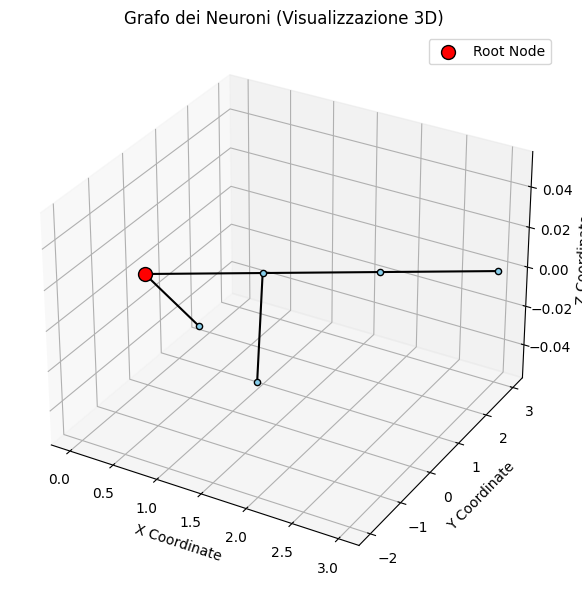

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

# Funzione per disegnare il grafo 3D con barra di avanzamento
def draw_3d_graph(G):

    # Crea una figura 3D
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Estrai le posizioni dei nodi dal grafo
    node_pos = nx.get_node_attributes(G, 'pos')

    # Aggiungi la barra di avanzamento
    with tqdm(total=len(G.nodes()), desc="Drawing nodes") as pbar:
        # Disegna i nodi
        for node, (x, y, z) in node_pos.items():
            if node == 1:
                ax.scatter(x, y, z, color='red', edgecolors='black', s=100, label='Root Node')
            else:
                ax.scatter(x, y, z, color='skyblue', edgecolors='black', s=20)
            pbar.update(1)  # Aggiorna la barra di avanzamento

    # Disegna gli archi
    for edge in G.edges():
        start = node_pos[edge[0]]
        end = node_pos[edge[1]]
        ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], color='black')

    ax.set_title('Grafo dei Neuroni (Visualizzazione 3D)')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    ax.grid(True)
    ax.legend()



    plt.tight_layout()
    plt.show()

# Chiamata alla funzione per disegnare il grafo
draw_3d_graph(G)
